In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [17]:
data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv") 

In [18]:
TARGET_COL = 'Churn'


In [19]:
def preprocess_data(data):
    # Drop columns that are unlikely to contribute to prediction
    drop_cols = ['RowNumber', 'CustomerId', 'Surname']
    data = data.drop(columns=drop_cols)
    
    # Label encode categorical variables
    categorical_cols = ['Geography', 'Gender']
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    # Normalize numerical columns that vary in range
    scaler = StandardScaler()
    numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts']
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
    
    return data

In [20]:
data = preprocess_data(data)

In [21]:
print(data.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [22]:
TARGET_COL = 'Exited'
X = data.drop(columns=[TARGET_COL])
y = data[TARGET_COL]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
log_reg = LogisticRegression(random_state=42)
forest = RandomForestClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

In [25]:
models = {'Logistic Regression': log_reg, 'Random Forest': forest, 'Gradient Boosting': gbc}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    print(f"\n{model_name} Evaluation:")
    print(classification_report(y_test, y_test_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_pred):.4f}")


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

ROC AUC Score: 0.5000


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

ROC AUC Score: 0.7135

Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

ROC AUC Score: 0.7154


In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

In [27]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

In [28]:
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color="grey", lw=1, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

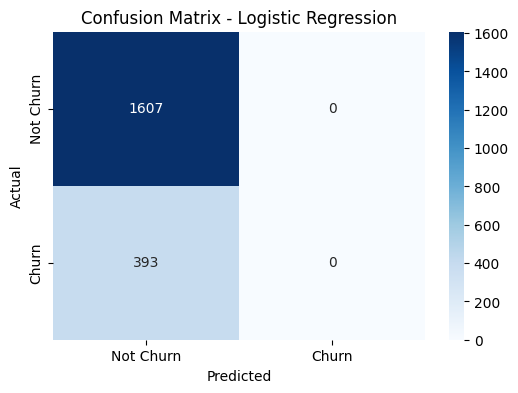

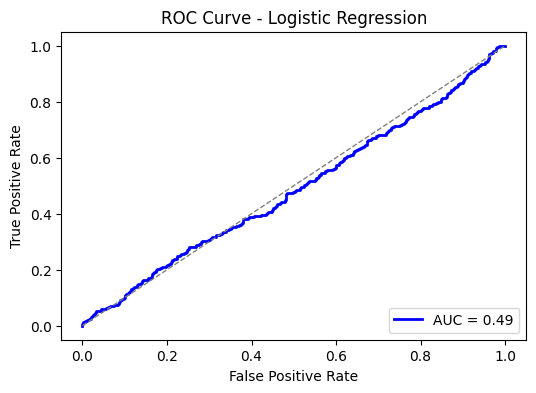

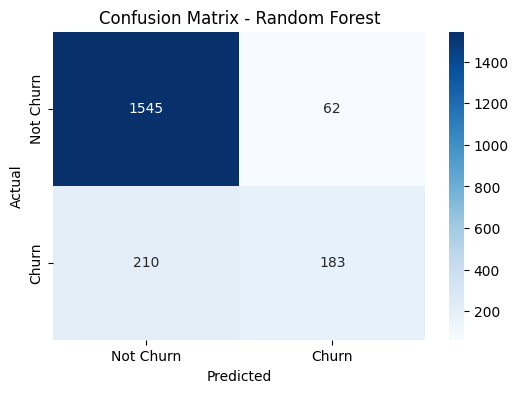

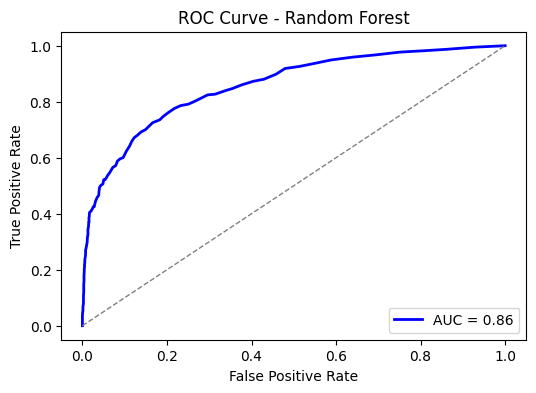

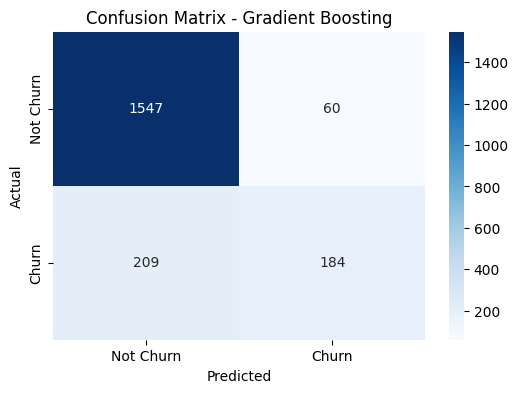

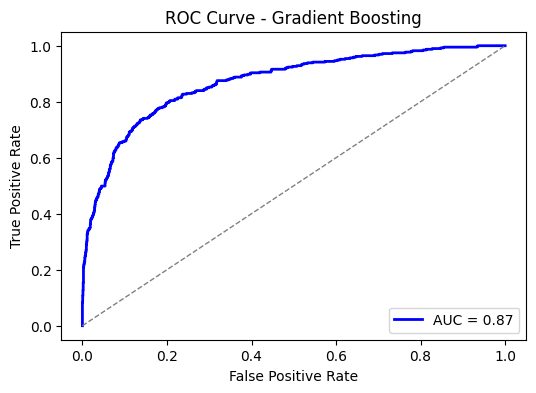

In [29]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict labels and probabilities
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    
    # Plot Confusion Matrix
    plot_confusion_matrix(y_test, y_test_pred, model_name)
    
    # Plot ROC Curve
    plot_roc_curve(y_test, y_test_pred_prob, model_name)